In [1]:
from lightkurve import search_targetpixelfile
import matplotlib.pyplot as plt


C:\Users\rpj20\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


KeplerTargetPixelFile Object (ID: 6922244)


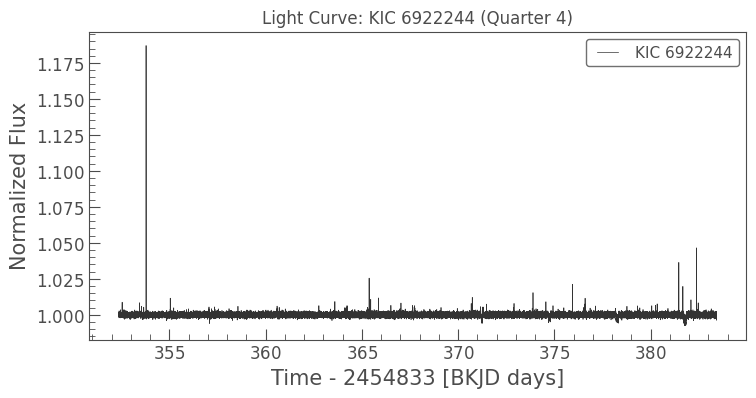

In [6]:
# Search and download the Target Pixel File for KIC 6922244 (4th Quarter)
kic_search = search_targetpixelfile("KIC 6922244", mission="Kepler", quarter=4)
kic_pixelfile = kic_search.download()

# Check if the data downloaded successfully
print(kic_pixelfile)

# Convert to light curve
kic_lc1 = kic_pixelfile.to_lightcurve(aperture_mask="all")
kic_lc= kic_lc1.flatten(window_length=401)
# Plot the light curve
kic_lc.plot()
plt.title("Light Curve: KIC 6922244 (Quarter 4)")
plt.show()


In [7]:
import numpy as np

# Calculate baseline flux (average flux outside transit)
baseline_flux = kic_lc.flux.mean()

# Calculate minimum flux during transit
min_flux = kic_lc.flux.min()

# Compute transit depth
transit_depth = (baseline_flux - min_flux) / baseline_flux

# Calculate planet-star radius ratio
radius_ratio = np.sqrt(transit_depth)

print(f"Baseline Flux: {baseline_flux:.2f}")
print(f"Minimum Flux (Transit): {min_flux:.2f}")
print(f"Transit Depth (ΔF): {transit_depth:.6f}")
print(f"Planet-Star Radius Ratio (R_p / R_*): {radius_ratio:.6f}")


Baseline Flux: 1.00
Minimum Flux (Transit): 0.99
Transit Depth (ΔF): 0.007491
Planet-Star Radius Ratio (R_p / R_*): 0.086552


In [9]:
import numpy as np
periodogram = kic_lc.to_periodogram(method="bls", period=np.arange(1, 5, 0.001))
print(periodogram.period_at_max_power)

3.524999999999722 d


C:\Users\rpj20\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


TessTargetPixelFile(TICID: 261136679)


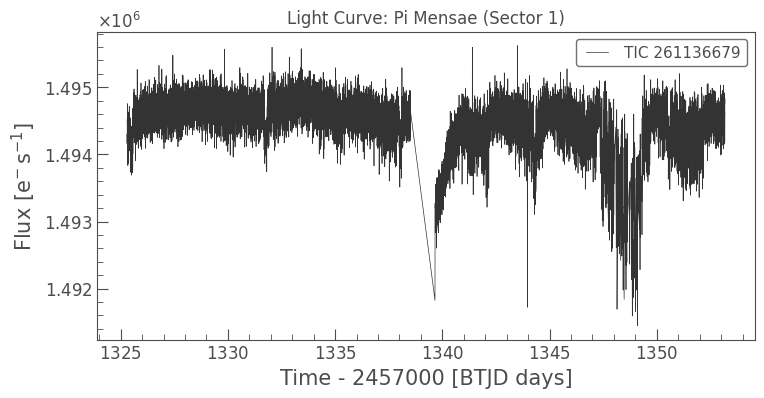

In [11]:
# Search and download the Target Pixel File for Pi Mensae (TESS, Sector 1)
pi_search = search_targetpixelfile("Pi Mensae", mission="TESS", sector=1)
tpf = pi_search.download()

# Check if the data downloaded successfully
print(tpf)

# Convert to light curve
pi_lc = tpf.to_lightcurve(aperture_mask="all")

# Plot the light curve
pi_lc.plot()
plt.title("Light Curve: Pi Mensae (Sector 1)")
plt.show()


In [22]:
aperture_mask = tpf.create_threshold_mask(threshold=10)
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)
flat_lc = lc.flatten(window_length=1001)

masked_lc = flat_lc[0:int(5*(len(flat_lc.time))/10)]

clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.scatter(s=0.4)
periodogram = clipped_lc.to_periodogram(method="bls", period=np.arange(1, 10, 0.001))
periodogram.plot()
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 6.276 d


In [23]:
# Calculate baseline flux (average flux outside transit)
baseline_flux = flat_lc.flux.mean()

# Calculate minimum flux during transit
min_flux = flat_lc.flux.min()

# Compute transit depth
transit_depth = (baseline_flux - min_flux) / baseline_flux

# Calculate planet-star radius ratio
radius_ratio = np.sqrt(transit_depth)

print(f"Baseline Flux: {baseline_flux:.2f}")
print(f"Minimum Flux (Transit): {min_flux:.2f}")
print(f"Transit Depth (ΔF): {transit_depth:.6f}")
print(f"Planet-Star Radius Ratio (R_p / R_*): {radius_ratio:.6f}")


Baseline Flux: 1.00
Minimum Flux (Transit): 0.99
Transit Depth (ΔF): 0.008678
Planet-Star Radius Ratio (R_p / R_*): 0.093155
